<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold

In [2]:
pip install

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the 'c:\Users\jabko\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [20]:
df = pd.read_csv(r'NY-House-Dataset.csv',sep=';',
                 index_col =  False,
                 on_bad_lines='skip')


In [21]:
headers = pd.read_csv(r'NY-House-Dataset.csv', sep=';',nrows=0)
header_names = headers.columns.tolist()

In [22]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
column_rename_dict = {old_name: new_name for old_name, new_name in zip(df.columns, header_names)}

df.rename(columns=column_rename_dict, inplace=True)

In [6]:
str_col = ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME' , 'LONG_NAME', 'FORMATTED_ADDRESS']
int_col = ['BEDS', 'BATH','PROPERTYSQFT']
float_col = ['PRICE']

In [7]:
df.shape

(4801, 17)

In [8]:
df.isna().any()

BROKERTITLE                    False
TYPE                           False
PRICE                          False
BEDS                           False
BATH                           False
PROPERTYSQFT                   False
ADDRESS                        False
STATE                          False
MAIN_ADDRESS                   False
ADMINISTRATIVE_AREA_LEVEL_2    False
LOCALITY                       False
SUBLOCALITY                    False
STREET_NAME                    False
LONG_NAME                      False
FORMATTED_ADDRESS              False
LATITUDE                       False
LONGITUDE                      False
dtype: bool

In [9]:
df[str_col] = df[str_col].apply(lambda x: x.astype(str))

In [10]:
df[int_col] = df[int_col].apply(lambda x: x.astype(int))

In [11]:
df[float_col] = df[float_col].apply(lambda x: x.astype(float))

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.loc[df['BATH'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [14]:
df.loc[df['PRICE'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [15]:
df.loc[df['BEDS']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [16]:
df.loc[df['PROPERTYSQFT']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [17]:
df['FORMATTED_ADDRESS'] = df['FORMATTED_ADDRESS'].apply(lambda x: x.replace('#', ''))


In [18]:
le = LabelEncoder()

In [19]:
columns_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME']


In [23]:
df[columns_to_encode] = df[columns_to_encode].apply(LabelEncoder().fit_transform)

In [24]:
df.to_excel('test.xlsx')

In [25]:
numeric_columns = ['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE']
df_numeric = df[numeric_columns]

scaler = preprocessing.StandardScaler().fit(df_numeric)


df_scaled = pd.DataFrame(scaler.transform(df_numeric), columns=numeric_columns)


df[numeric_columns] = df_scaled

In [26]:
X = df[['BATH', 'BEDS', 'PROPERTYSQFT']]
y = df['PRICE']

In [27]:
X = X.dropna()
y = y[X.index]


<Axes: >

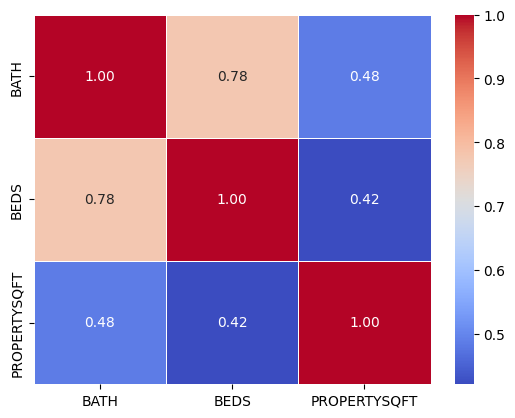

In [28]:
selected_df =  df[['BATH', 'BEDS', 'PROPERTYSQFT']]
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

<Axes: >

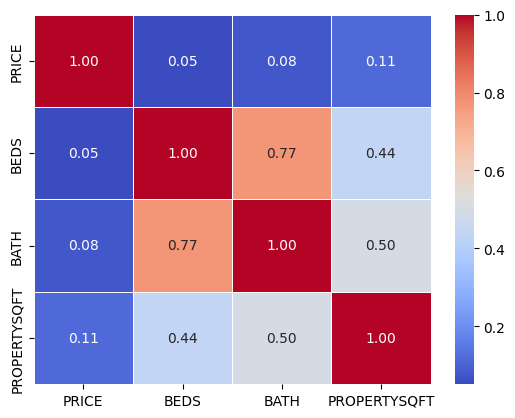

In [35]:
#Powinny byc chyba tyko X ale nie jestem pewien 
#selected_df = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
#sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

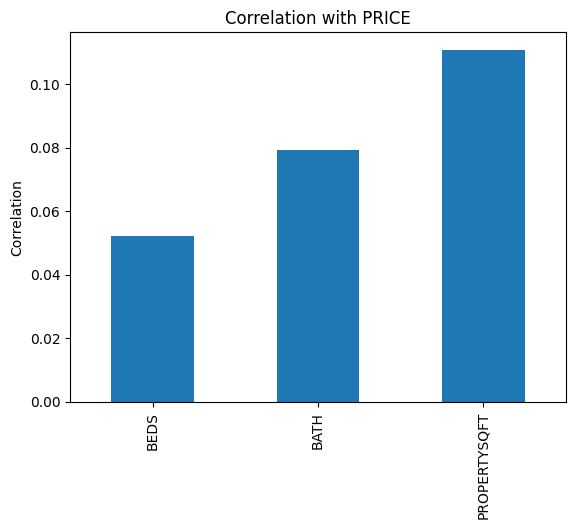

In [29]:
# Select the columns
cor_df = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',]]

# Calculate the correlation with 'PRICE'
correlation = cor_df.corr()['PRICE'].drop('PRICE')

# Plot the correlation values
correlation.sort_values().plot(kind='bar')
plt.title('Correlation with PRICE')
plt.ylabel('Correlation')
plt.show()

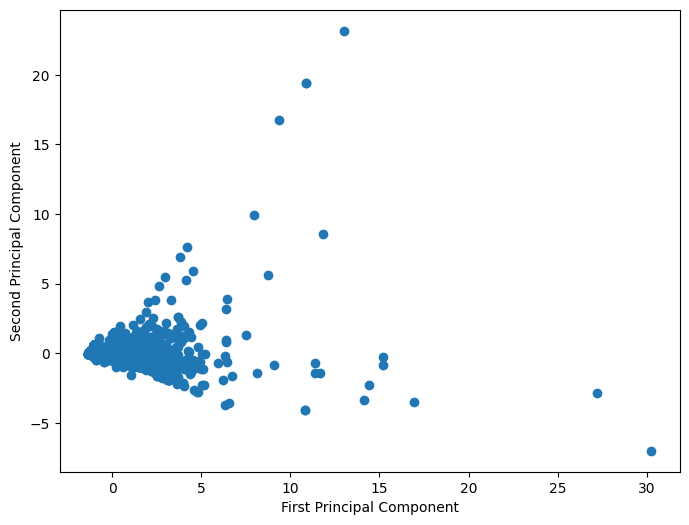

In [30]:

selected_df = selected_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_df)
df_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])


plt.figure(figsize=(8,6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [31]:
df.dtypes

BROKERTITLE                     object
TYPE                             int32
PRICE                          float64
BEDS                           float64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                            int32
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2      int32
LOCALITY                         int32
SUBLOCALITY                      int32
STREET_NAME                      int32
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.coef_
reg.intercept_
y_predict = reg.predict(X_test)

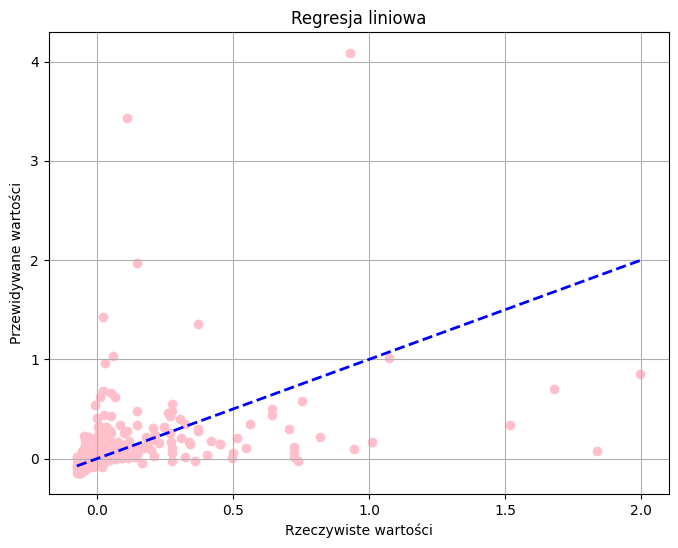

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja liniowa')
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import  HuberRegressor

In [35]:
y_true = y_test
mean_absolute_error(y_true,y_predict)

0.06864034551595524

In [36]:
y_true = y_test
median_absolute_error(y_true,y_predict)

0.0393939217044073

SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 17%

In [37]:
y_true = y_test
r2_score(y_true,y_predict)

-0.7078946488393545

In [38]:
huber = HuberRegressor().fit(X_train, y_train)
huber.coef_
huber.intercept_
y_predict_huber = huber.predict(X_test)

In [39]:
y_true = y_test
mean_absolute_error(y_true,y_predict_huber)

0.0369523653345252

In [40]:

y_true = y_test
median_absolute_error(y_true,y_predict_huber)
     

0.011123580657089745

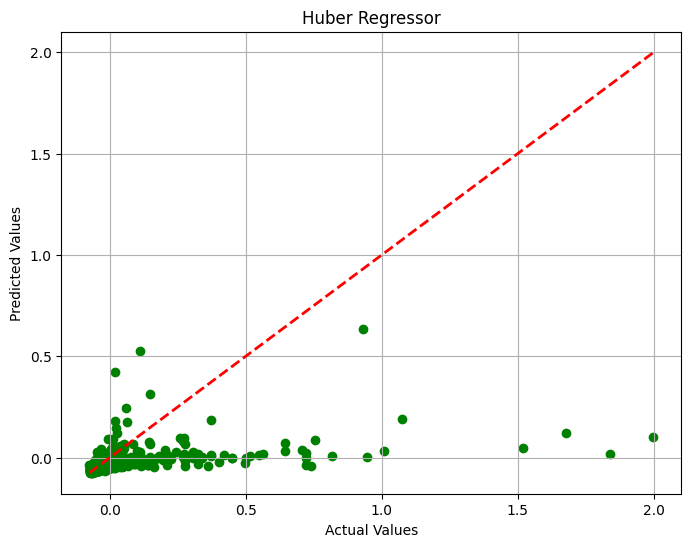

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_huber, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Huber Regressor')
plt.grid(True)
plt.show()

In [82]:
huber_model = HuberRegressor().fit(X_train, y_train)
huber_model.score(X_train, y_train)
huber_model.coef_
huber_model.intercept_
predictions_huber = np.round(huber_model.predict(X_test))
print(predictions_huber)

[-0. -0. -0. ... -0. -0. -0.]


SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 19% Nie wiem dlaczego za kazdym razem, gdy włączymy od nowa plik wyniki są różne, chyba ze wzgledu na dobieranie testowego modelu


In [77]:
y_true = y_test
r2_score(y_true,y_predict_huber)

0.15531588904252525

In [76]:
huber = HuberRegressor().fit(X_train,y_train)
huber.score(X_train,y_train)
huber.coef_
huber.intercept_
y_predic_huber = np.round(huber.predict(X_test))
print (y_predic_huber)

[-0. -0. -0. ... -0. -0. -0.]


In [73]:
from sklearn.model_selection import cross_val_score
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lin = LinearRegression()
cv_scores = cross_val_score(lin, X , y, cv=rkf, scoring='neg_mean_absolute_error')
print(cv_scores)

[-0.0587591  -0.0673509  -0.1126532  -0.0584174  -0.05384661 -0.11430206
 -0.05796541 -0.05799262 -0.06315028 -0.05726864 -0.11690206 -0.05916869
 -0.06567862 -0.06048542 -0.05955931]


Wielomian drugiego i trzeciego stopnia, regresja.

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [62]:
#2
degree2_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)), ('linear_regression', LinearRegression())])

degree2_pipeline.fit(X_train, y_train)
predictions_degree2 = np.round(degree2_pipeline.predict(X_test))
print(predictions_degree2)
print("2 stopien r2 ", degree2_pipeline.score(X_test, y_test))

[ 0. -0.  0. ... -0.  0. -0.]
2 stopien r2  -1.5298896786914211


In [58]:

repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_2 = PolynomialFeatures(2)
X_transformed = poly_features_2.fit_transform(X)
cross_val_scores_2nd_degree = cross_val_score(linear_model, X_transformed, y, cv=repeat_kfold, scoring='neg_mean_absolute_error')
print(cross_val_scores_2nd_degree)

[-0.09308824 -0.09665187 -0.11847105 -0.09832486 -0.08267189 -0.12383711
 -0.09040069 -0.0878275  -0.08988489 -0.08931272 -0.1230366  -0.07924765
 -0.102298   -0.08538951 -0.09061594]


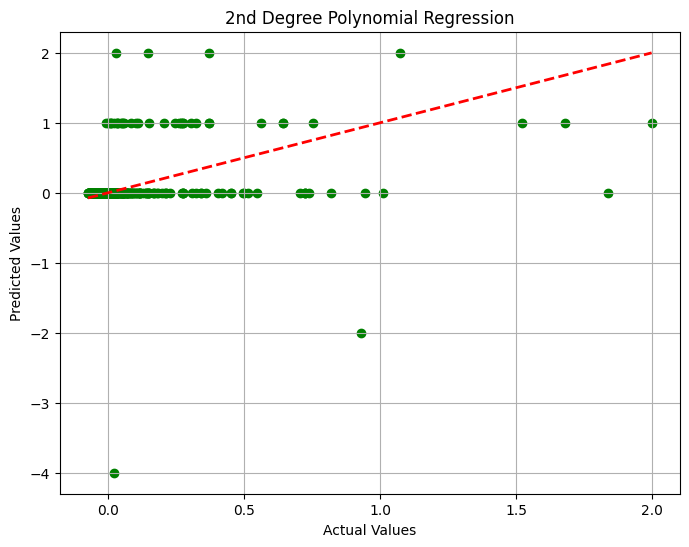

In [55]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree2, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('2nd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [63]:
#3 stopien

degree3_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])


degree3_pipeline.fit(X_train, y_train)


predictions_degree3 = np.round(degree3_pipeline.predict(X_test))


print(predictions_degree3)
print("3 stopien r2 ", degree3_pipeline.score(X_test, y_test))

[ 0. -0.  0. ... -0.  0. -0.]
3 stopien r2  -84.5385694850687


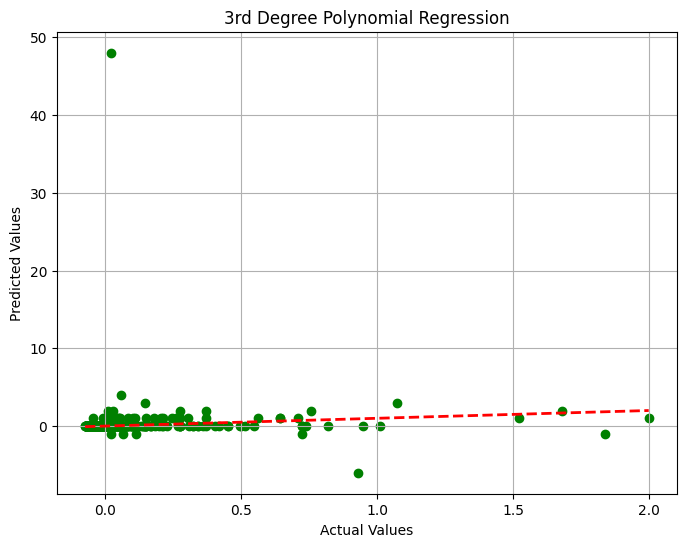

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_degree3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('3rd Degree Polynomial Regression')
plt.grid(True)
plt.show()

In [68]:
#cross knn
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
cross_val_scores_knn = cross_val_score(knn_model, X, y, cv=rkf, scoring='neg_mean_absolute_error')
print(cross_val_scores_knn)

[-0.11175656 -0.03788087 -0.11226291 -0.06860971 -0.06148465 -0.11056351
 -0.06677227 -0.04188881 -0.04356626 -0.13028826 -0.11011342 -0.04309953
 -0.06186137 -0.10823192 -0.06669685]


In [69]:
#cross 3 stopien
repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
linear_model = LinearRegression()
poly_features_3 = PolynomialFeatures(3)
X_transformed_3 = poly_features_3.fit_transform(X)
cross_val_scores_3rd_degree = cross_val_score(linear_model, X_transformed_3, y, cv=repeat_kfold, scoring='neg_mean_absolute_error')
print(cross_val_scores_3rd_degree)

[-0.09049312 -0.16905597 -0.11859232 -0.08755871 -0.07708314 -0.12496768
 -0.09230247 -0.16311189 -0.09453038 -0.07610532 -0.11902206 -0.08329545
 -0.16901318 -0.08560785 -0.08939412]


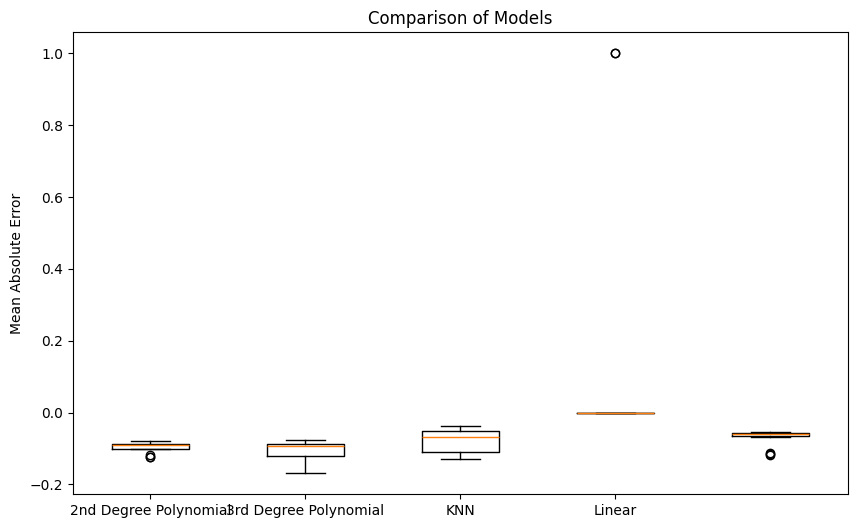

In [83]:
#boxplot dla wszystkich modeli
plt.figure(figsize=(10, 6))
plt.boxplot([cross_val_scores_2nd_degree, cross_val_scores_3rd_degree, cross_val_scores_knn,predictions_huber, cv_scores])
plt.xticks([1, 2, 3, 4], ['2nd Degree Polynomial', '3rd Degree Polynomial', 'KNN', 'Linear'])
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Models')
plt.show()
